### Lo que se debe hacer primero es importar las librerías y analizar cómo es la base de datos

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
houses = pd.read_csv('../../Data/house_prices/train.csv')

In [3]:
houses.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
houses.shape

(1460, 81)

In [5]:
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Después analizaremos los valores nulos de cada columna para saber cuáles no nos servirán en el modelo

In [7]:
houses.isnull().sum().sort_values(ascending = False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [8]:
nulos_columnas = houses.isnull().sum()
nulos_columnas

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
nulos_columnas[nulos_columnas > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
porcentaje_nulos = nulos_columnas[nulos_columnas > 0]/houses.shape[0]
porcentaje_nulos.sort_values(ascending = False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [11]:
porcentaje_nulos.index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [12]:
houses_only_nulls = houses[porcentaje_nulos.index]
houses_only_nulls

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [13]:
houses_only_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [14]:
columnas_eliminar = porcentaje_nulos[porcentaje_nulos > .15].index #eliminaré las columnas con nulos mayor al 15% del total
columnas_eliminar

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [15]:
houses_clean = houses.drop(columns = columnas_eliminar)

In [16]:
houses_clean = houses_clean.drop(columns=['Id']) #también se eliminará la columna Id ya que no aporta al precio de la casa

In [17]:
houses_clean.shape

(1460, 74)

In [18]:
houses_clean.head(3)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500


### Ya que se tiene el dataframe limpio de nulos analizaré la distribución de la variable a estudiar, que en este caso es el precio de la casa

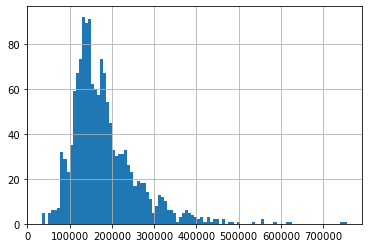

In [19]:
houses_clean.SalePrice.hist(bins = 100);

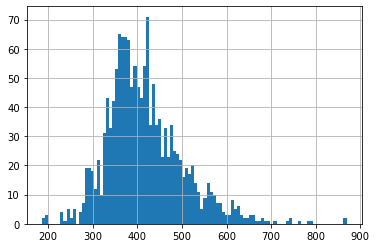

In [20]:
# La distribución podría ser más equilibrada de los dos lados, por lo tanto intentaré formas de normalizarla, primero con raíz cuadrada

np.sqrt(houses_clean['SalePrice']).hist(bins = 100);

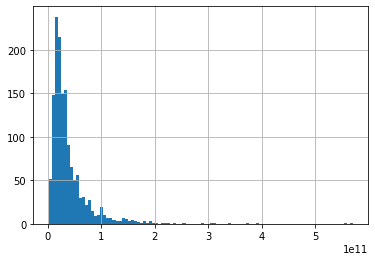

In [21]:
# Después con elevarla al cuadrado

(((houses_clean['SalePrice'])) ** 2).hist(bins = 100);

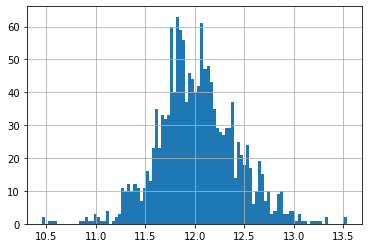

In [22]:
# Y por último con logaritmo, aquí se ve que es la gráfica más balanceada

np.log(houses_clean['SalePrice']).hist(bins = 100);

In [23]:
houses_clean['SalePriceLog'] = np.log(houses_clean['SalePrice']) #agregamos esa nueva columna al dataframe
houses_clean.head(2)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceLog
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,5,2007,WD,Normal,181500,12.109011


### Aún quedan bastantes columnas, así que después de leer la descripción de cada una, elegí las más importantes y agrupé de una manera que me pareció lógica

In [65]:
houses_clean.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [48]:
houses_small_c = houses_clean[['Neighborhood', 'LotArea']]

houses_small_c['rooms_area'] = houses_clean['GrLivArea'] + houses_clean['GarageArea'] + houses_clean['TotalBsmtSF'] + houses_clean['WoodDeckSF'] + houses_clean['OpenPorchSF'] + houses_clean['EnclosedPorch'] + houses_clean['3SsnPorch']+ houses_clean['ScreenPorch'] + houses_clean['PoolArea']
    
houses_small_c['total_num_rooms'] = houses_clean.BedroomAbvGr + houses_clean.KitchenAbvGr + houses_clean.FullBath + houses_clean.HalfBath + houses_clean.BsmtFullBath + houses_clean.BsmtHalfBath

houses_small_c['quality_condition'] = houses_clean['OverallCond'] + houses_clean['OverallQual']

houses_small_c['years_since_built'] = 2022 - houses_clean.YearBuilt

houses_small_c['years_since_remod'] = 2022 - houses_clean.YearRemodAdd

houses_small_c.head(3)

/var/folders/qn/d5_7tb1x561dlhpvhyh3k0rr0000gn/T/ipykernel_92497/2551492073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses_small_c['rooms_area'] = houses_clean['GrLivArea'] + houses_clean['GarageArea'] + houses_clean['TotalBsmtSF'] + houses_clean['WoodDeckSF'] + houses_clean['OpenPorchSF'] + houses_clean['EnclosedPorch'] + houses_clean['3SsnPorch']+ houses_clean['ScreenPorch'] + houses_clean['PoolArea']
/var/folders/qn/d5_7tb1x561dlhpvhyh3k0rr0000gn/T/ipykernel_92497/2551492073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,Neighborhood,LotArea,rooms_area,total_num_rooms,quality_condition,years_since_built,years_since_remod
0,CollgCr,8450,3175,8,12,19,19
1,Veenker,9600,3282,7,14,46,46
2,CollgCr,11250,3356,8,12,21,20


### Después convertimos a valor numérico todas las variables, la de Vecindario la mejor manera de hacerlo sería con dummies pero dado que son demasiados valores únicos se agregan demasiadas columnas

In [49]:
houses_numeric = houses_small_c._get_numeric_data()

houses_numeric['Neighborhood_num'] = houses_small_c['Neighborhood'].astype('category').cat.codes

In [50]:
houses_numeric

,LotArea,rooms_area,total_num_rooms,quality_condition,years_since_built,years_since_remod,Neighborhood_num
0,8450,3175,8,12,19,19,5
1,9600,3282,7,14,46,46,24
2,11250,3356,8,12,21,20,5
3,9550,3422,6,12,107,52,6
4,14260,4455,9,13,22,22,15
...,...,...,...,...,...,...,...
1455,7917,3100,7,11,23,22,8
1456,13175,4464,7,12,44,34,14
1457,9042,3804,7,16,81,16,6
1458,9717,2874,5,11,72,26,12


### Después escalamos las variables para que estén en una escala similar

In [51]:
houses_final = StandardScaler().fit_transform(houses_numeric)
houses_final = pd.DataFrame(houses_final)

In [52]:
houses_final.head(3)

,0,1,2,3,4,5,6
0,-0.207142,-0.052879,1.158965,0.192175,-1.050994,-0.878668,-1.206215
1,-0.091886,0.050066,0.459176,1.373547,-0.156734,0.429577,1.954302
2,0.073480,0.121262,1.158965,0.192175,-0.984752,-0.830215,-1.206215


In [53]:
houses_final.rename(columns= {0:'LotArea_scaled', 1:'rooms_area_scaled', 2:'total_num_rooms_scaled', 3:'quality_condition_scaled', 4:'years_since_built_scaled', 5:'years_since_remod_scaled', 6:'Neighborhood_num_scaled'}, inplace = True)
houses_final.head(3).T

,0,1,2
LotArea_scaled,-0.207142,-0.091886,0.073480
rooms_area_scaled,-0.052879,0.050066,0.121262
total_num_rooms_scaled,1.158965,0.459176,1.158965
quality_condition_scaled,0.192175,1.373547,0.192175
years_since_built_scaled,-1.050994,-0.156734,-0.984752
years_since_remod_scaled,-0.878668,0.429577,-0.830215
Neighborhood_num_scaled,-1.206215,1.954302,-1.206215


In [54]:
houses_final.describe()

,LotArea_scaled,rooms_area_scaled,total_num_rooms_scaled,quality_condition_scaled,years_since_built_scaled,years_since_remod_scaled,Neighborhood_num_scaled
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-4.202783e-17,-1.106421e-16,1.447852e-16,6.387585e-17,-1.126572e-16,-4.212764e-17,-3.414316e-17
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-9.237292e-01,-2.786217e+00,-2.339977e+00,-5.714684e+00,-1.282839e+00,-1.217843e+00,-2.037929e+00
25%,-2.969908e-01,-6.775251e-01,-9.404005e-01,-3.985107e-01,-9.516316e-01,-9.271216e-01,-8.735286e-01
50%,-1.040633e-01,-1.216693e-01,-2.406122e-01,1.921752e-01,-5.737148e-02,-4.425864e-01,-4.181361e-02
75%,1.087080e-01,5.335238e-01,4.591762e-01,7.828611e-01,5.719226e-01,8.656586e-01,7.899013e-01
max,2.051827e+01,1.051199e+01,5.357695e+00,4.326976e+00,3.287824e+00,1.689368e+00,1.954302e+00


## Análisis estadístico

### Correlación

In [55]:
houses_final['SalePriceLog'] = houses_clean['SalePriceLog']
houses_final['SalePrice'] = houses_clean['SalePrice']

In [63]:
houses_final.corr()[['SalePriceLog', 'SalePrice']].sort_values(by = 'SalePriceLog', ascending = False)

#La variable que tiene la correlación más alta es la del área total de los cuartos, seguida por la calidad y la condición de la casa

,SalePriceLog,SalePrice
SalePriceLog,1.000000,0.948374
SalePrice,0.948374,1.000000
rooms_area_scaled,0.809090,0.807704
quality_condition_scaled,0.643117,0.594786
total_num_rooms_scaled,0.521120,0.470702
LotArea_scaled,0.257320,0.263843
Neighborhood_num_scaled,0.201685,0.210851
years_since_remod_scaled,-0.565608,-0.507101
years_since_built_scaled,-0.586570,-0.522897


#### Las tres columnas con correlación más alta son la del área total de cuartos, seguida por la calidad y la condición de la casa y por último los años que tiene la casa tiene una alta correlación negativa

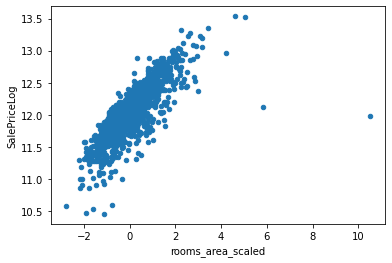

In [59]:
#Graficamos las tres variables con mayor correlación para ver su comportamiento

houses_final.plot.scatter(x = 'rooms_area_scaled', y = 'SalePriceLog');

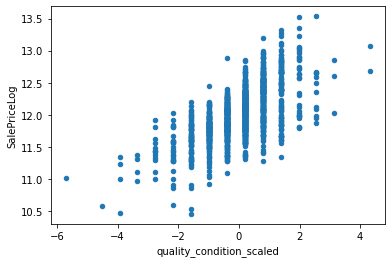

In [60]:
houses_final.plot.scatter(x = 'quality_condition_scaled', y = 'SalePriceLog');

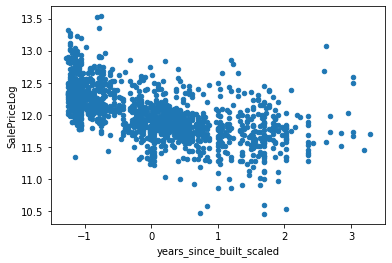

In [64]:
houses_final.plot.scatter(x = 'years_since_built_scaled', y = 'SalePriceLog');

### Tabla ANOVA

In [65]:
model = ols('SalePriceLog ~ LotArea_scaled + rooms_area_scaled + total_num_rooms_scaled + quality_condition_scaled + years_since_built_scaled + years_since_remod_scaled + Neighborhood_num_scaled', data=houses_final).fit()

In [66]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
LotArea_scaled,0.902376,1.0,34.178550,6.199997e-09
rooms_area_scaled,23.841211,1.0,903.013923,1.119567e-154
total_num_rooms_scaled,1.209420,1.0,45.808188,1.886687e-11
quality_condition_scaled,13.938415,1.0,527.933882,6.706010e-100
years_since_built_scaled,11.661272,1.0,441.684391,7.914976e-86
years_since_remod_scaled,0.226650,1.0,8.584631,3.443081e-03
Neighborhood_num_scaled,0.079201,1.0,2.999834,8.348544e-02
Residual,38.335442,1452.0,NaN,NaN


### Modelo OLS

In [67]:
X = sm.add_constant(houses_final[['LotArea_scaled', 'rooms_area_scaled', 'total_num_rooms_scaled', 'quality_condition_scaled', 'years_since_built_scaled', 'years_since_remod_scaled', 'Neighborhood_num_scaled']])
Y = houses_final.SalePriceLog

/Users/marcosrubio/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [68]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [70]:
print_model = model.summary()
print(print_model)


'''
La variable que más peso tiene es el área total de los cuartos porque tiene el mayor coeficiente 
y las variables que elegimos explican el 83.5% de la variación de los datos por lo que fue una buena elección

También podemos observar que el p-value del vecindario es relativamente grande por lo que puede no ser tan representativo (aunque el tema del
labeling también pudo haber influido)
'''

                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1052.
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:26:47   Log-Likelihood:                 585.42
No. Observations:                1460   AIC:                            -1155.
Df Residuals:                    1452   BIC:                            -1113.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

'\nLa variable que más peso tiene es el área total de los cuartos porque tiene el mayor coeficiente \ny las variables que elegimos explican el 83.5% de la variación de los datos\n'

### Graficar regresión lineal de top 3 de variables

#### Área total de las habitaciones

In [71]:
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = linregress(x = houses_final.rooms_area_scaled, y = houses_final.SalePriceLog)

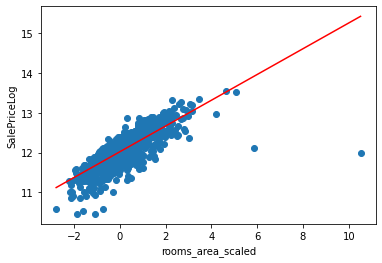

In [79]:
plt.scatter(x = houses_final.rooms_area_scaled, y = houses_final.SalePriceLog)

x = [houses_final.rooms_area_scaled.min(), houses_final.rooms_area_scaled.max()]
y = [houses_final.rooms_area_scaled.min() * slope_1 + intercept_1, houses_final.rooms_area_scaled.max() * slope_1 + intercept_1]
plt.plot(x,y, color='r')
plt.xlabel('rooms_area_scaled')
plt.ylabel('SalePriceLog');

#### Calidad y condición de la casa

In [73]:
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = linregress(x = houses_final.quality_condition_scaled, y = houses_final.SalePriceLog)

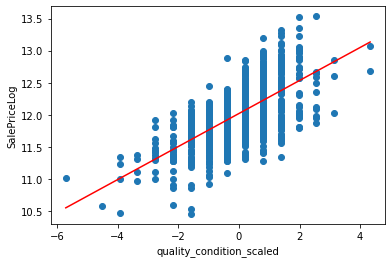

In [80]:
plt.scatter(x = houses_final.quality_condition_scaled, y = houses_final.SalePriceLog)

x = [houses_final.quality_condition_scaled.min(), houses_final.quality_condition_scaled.max()]
y = [houses_final.quality_condition_scaled.min() * slope_2 + intercept_2, houses_final.quality_condition_scaled.max() * slope_2 + intercept_2]
plt.plot(x,y, color='r')
plt.xlabel('quality_condition_scaled')
plt.ylabel('SalePriceLog');

In [ ]:
years_since_built_scaled

#### Edad de la casa

In [76]:
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = linregress(x = houses_final.years_since_built_scaled, y = houses_final.SalePriceLog)

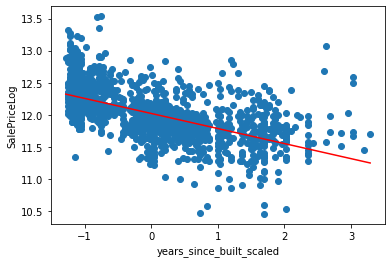

In [78]:
plt.scatter(x = houses_final.years_since_built_scaled, y = houses_final.SalePriceLog)

x = [houses_final.years_since_built_scaled.min(), houses_final.years_since_built_scaled.max()]
y = [houses_final.years_since_built_scaled.min() * slope_3 + intercept_3, houses_final.years_since_built_scaled.max() * slope_3 + intercept_3]
plt.plot(x,y, color='r')
plt.xlabel('years_since_built_scaled')
plt.ylabel('SalePriceLog');

# Conclusión: Dado que el objetivo del proyecto es "... to identify the most important features of houses that affect the sale prices." La respuesta es el área total en pies cuadrados de las recámaras de la casa

